In [1]:
from matching_string_distance import MSSD
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

traj1 = great_circle_with_time(2*math.pi*0.5, time_i=0, time_f=7)
traj2 = great_circle_with_time(2*math.pi*0.6, time_i=3, time_f=9)

In [18]:
dist_mat = np.zeros((len(traj1), len(traj2)))
eps = 0.68
for i in range(len(traj1)):
    for j in range(len(traj2)):
        dist_mat[i,j] = round(np.linalg.norm(traj1[i][1:]-traj2[j][1:]), 3)
        
print((dist_mat < eps)*np.ones((len(traj1), len(traj2))))
#plt.matshow((dist_mat < eps))

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0.]]


In [11]:
mssd = MSSD()
mssd.set_trajectories(traj1, traj2)

mssd.compute_matching_dist()

[(0.5, 1), (0.529, 1), (0.588, 1), (0.588, 2), (0.618, 4), (0.626, 4), (0.626, 4), (0.626, 4), (0.679, 4), (0.679, 4), (0.679, 4), (0.679, 5), (0.691, 5), (0.772, 5), (0.772, 5), (0.831, 5), (0.831, 5), (0.831, 5), (0.853, 5), (0.853, 6), (0.908, 6), (0.968, 6), (1.024, 6), (1.024, 6), (1.058, 6), (1.058, 6), (1.058, 6), (1.176, 6), (1.225, 6), (1.263, 6), (1.263, 6), (1.277, 6), (1.414, 6), (1.453, 6), (1.477, 6), (1.477, 6), (1.618, 6), (1.647, 6), (1.658, 6), (1.782, 6), (1.801, 6), (1.902, 6)]


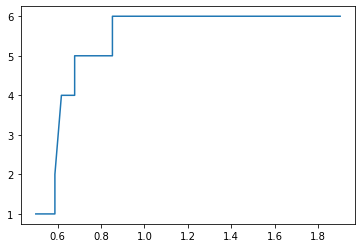

In [12]:
print(mssd.filt)

x = [mssd.filt[i][0] for i in range(len(mssd.filt))]
y = [mssd.filt[i][1] for i in range(len(mssd.filt))]

plt.plot(x,y)
plt.show()